In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay

2025-02-20 12:06:43.687784: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
np.set_printoptions(suppress=True)

## Data Loading

In [3]:
data = pd.read_csv("Autism_Prediction/train.csv")
test_data = pd.read_csv("Autism_Prediction/test.csv")

In [4]:
data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [5]:
test_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,...,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,...,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,...,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,...,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,...,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self


In [6]:
scores = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
          'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

In [7]:
x_train = data[scores].astype(np.float32)
y_train = data["Class/ASD"].values.astype(np.float32)

In [8]:
x_test = test_data[scores].astype(np.float32)
y_test = (test_data["austim"].values == "yes").astype(np.float32)

## Model Fitting

In [9]:
lr_fit = LogisticRegression().fit(x_train, y_train)

In [10]:
lr_fit.coef_

array([[-0.00876888,  0.42359275,  0.6588415 ,  1.00784535,  0.61545609,
         1.11793227,  0.4745065 ,  0.66591306,  1.06625923,  0.22407765]])

In [11]:
preds = lr_fit.predict(x_train)

In [12]:
avg_error_class = np.mean(preds == y_train)
print(f"Classification success rate: {avg_error_class}")

Classification success rate: 0.865


In [13]:
preds = lr_fit.predict_proba(x_train)[:,1]
threshold = .6
preds = (preds >= threshold).astype(y_train.dtype)

acc = np.mean(preds == y_train)
acc

0.87375

## Model Validation

## Understanding the ROC Curve

The **Receiver Operating Characteristic (ROC)** curve is a graphical representation used to evaluate the performance of a binary classification model. It plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold settings. Below is a an illustration of the ROC:


<img src="https://upload.wikimedia.org/wikipedia/commons/1/13/Roc_curve.svg" alt="ROC Curve" width="400"/>


- **True Positive Rate (TPR)**: Also known as sensitivity or recall, it measures the proportion of actual positives correctly identified.

$$
  TPR = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

- **False Positive Rate (FPR)**: It measures the proportion of actual negatives that were incorrectly classified as positive.
$$
  FPR = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}
$$


### Interpretation
- A model with an AUC close to 1.0 is highly capable of distinguishing between classes.
- A model with an AUC near 0.5 performs no better than random chance.

The ROC curve is useful for visualizing the trade-off between sensitivity and specificity across different thresholds.


In [14]:
probs = lr_fit.predict_proba(x_train)[:,1]


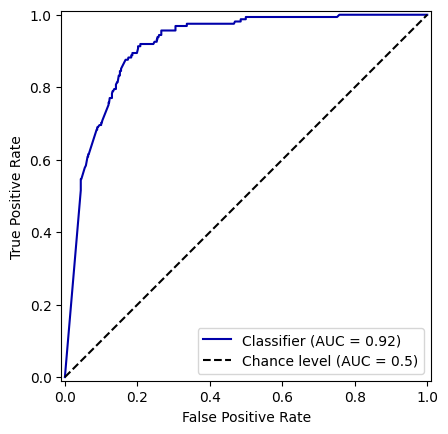

In [15]:
display = RocCurveDisplay.from_predictions(
    y_train,
    probs,
    color="#0000AA",
    plot_chance_level=True,
)

_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)

## Understanding the Confusion Matrix

The **Confusion Matrix** is a table that summarizes the performance of a classification model by comparing the predicted labels with the actual labels. It provides a detailed breakdown of correct and incorrect classifications for each class.

### Structure of a Confusion Matrix:
|                | **Predicted: Positive** | **Predicted: Negative** |
|----------------|--------------------------|--------------------------|
| **Actual: Positive** | True Positive (TP)        | False Negative (FN)        |
| **Actual: Negative** | False Positive (FP)       | True Negative (TN)         |

### Memory items:
1. **True Positive (TP)**: Cases where the model correctly predicts the positive class.
2. **False Negative (FN)**: Cases where the model fails to predict the positive class (misses a positive case).
3. **False Positive (FP)**: Cases where the model incorrectly predicts the positive class (false alarm).
4. **True Negative (TN)**: Cases where the model correctly predicts the negative class.

### Some Metrics Derived from the Confusion Matrix:
- **Accuracy**: The overall correctness of the model.
$$
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **Precision**: The proportion of positive predictions that are actually correct.
$$
  \text{Precision} = \frac{TP}{TP + FP}
$$

- **Recall (Sensitivity)**: The proportion of actual positives that are correctly identified.
$$
  \text{Recall} = \frac{TP}{TP + FN}
$$

- **F1-Score**: The harmonic mean of precision and recall.
$$
  \text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$


In [16]:
cm = confusion_matrix(y_train, preds)

In [17]:
lr_display = ConfusionMatrixDisplay(cm)

## Using the "Clinical Score"

Clinical test accuracy: 0.77375
Regression accuracy: 0.87375


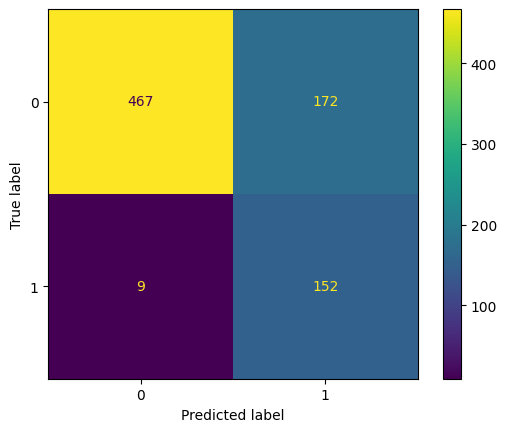

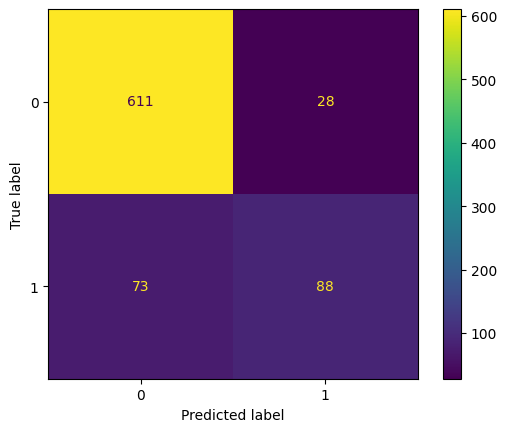

In [18]:
clinical_test_results = (x_train.sum(axis=1) >= 6).astype(y_train.dtype)
clinical_cm = confusion_matrix(y_train, clinical_test_results)
clinical_display = ConfusionMatrixDisplay(clinical_cm)

clinical_display.plot()
lr_display.plot()

clinical_acc = np.mean(clinical_test_results == y_train)

print(f"Clinical test accuracy: {clinical_acc}")
print(f"Regression accuracy: {acc}")

In [19]:
np.mean(preds == clinical_test_results)

0.74

### Going Deep With Neural Networks

In [20]:
nn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [21]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,249 (51.75 KB)

 Trainable params: 13,249 (51.75 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Spe fy the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

In [23]:
# Compiling the model
nn_model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

In [24]:
# Training the model
history = nn_model.fit(x=x_train, y=y_train, batch_size=32, epochs=150)

Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8188 - loss: 0.5799
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8540 - loss: 0.3799 
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8613 - loss: 0.2984 
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8717 - loss: 0.2876 
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8573 - loss: 0.2790 
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8487 - loss: 0.3005 
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8833 - loss: 0.2447 
Epoch 8/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8586 - loss: 0.2807 
Epoch 9/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8600 - loss: 0.2867 
Epoch 10/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8608 - loss: 0.2671 
Epoch 11/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8484 - loss: 0.2693 
Epoch 12/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [25]:
nn_model_probs = nn_model.predict(x_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


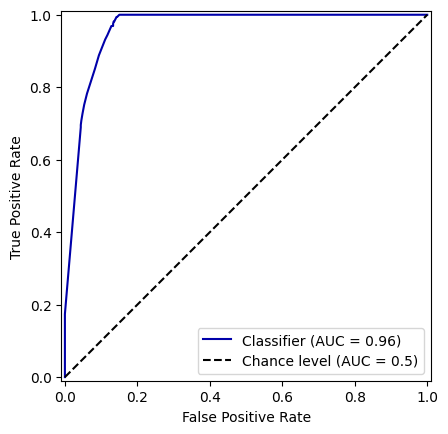

In [26]:
display = RocCurveDisplay.from_predictions(
    y_train,
    nn_model_probs,
    color="#0000AA",
    plot_chance_level=True,
)

_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)

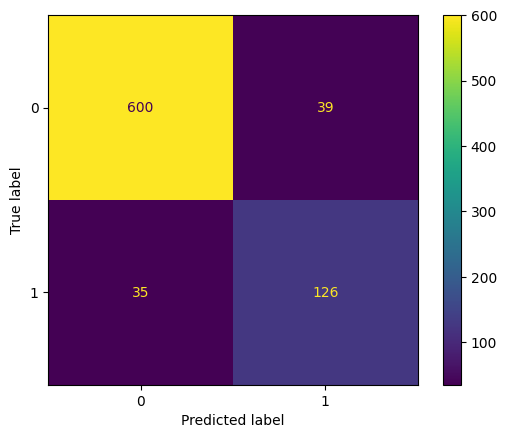

In [27]:
nn_model_cm = confusion_matrix(y_train, (nn_model_probs > 0.5).astype(y_train.dtype))
nn_model_display = ConfusionMatrixDisplay(nn_model_cm)
nn_model_display.plot()


In [28]:
nn_model_test_probs = nn_model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


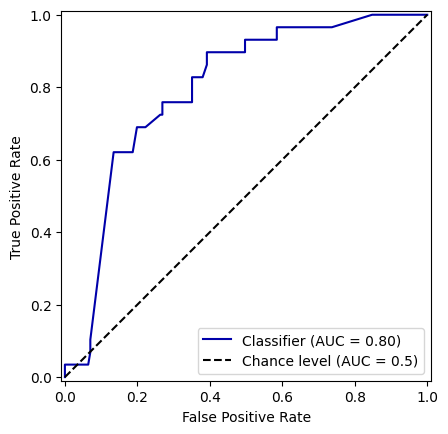

In [29]:
display = RocCurveDisplay.from_predictions(
    y_test,
    nn_model_test_probs,
    color="#0000AA",
    plot_chance_level=True,
)

_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)

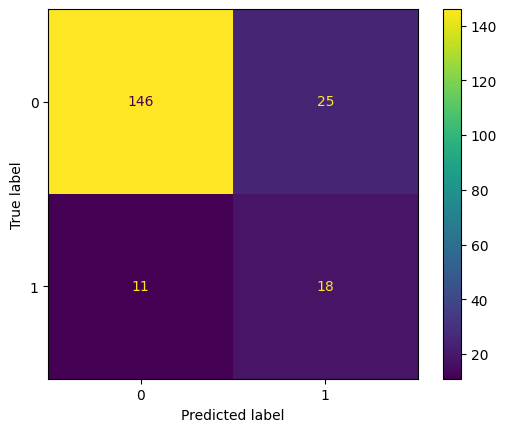

In [30]:
nn_model_test_cm = confusion_matrix(y_test, (nn_model_test_probs > 0.6).astype(y_train.dtype))
nn_model_test_display = ConfusionMatrixDisplay(nn_model_test_cm)
nn_model_test_display.plot()

In [31]:
lr_test_probs = lr_fit.predict_proba(x_test)[:,1]


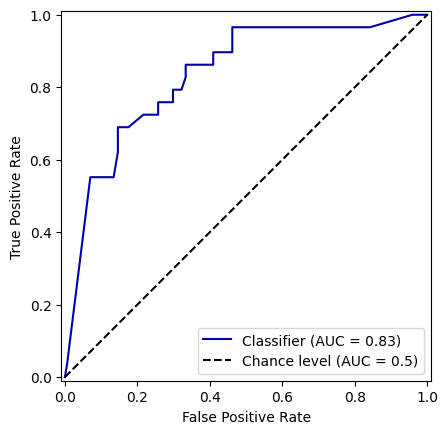

In [32]:
display = RocCurveDisplay.from_predictions(
    y_test,
    lr_test_probs,
    color="#0000AA",
    plot_chance_level=True,
)

_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)

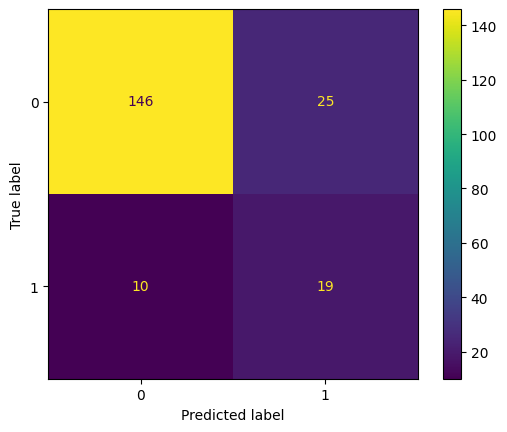

In [33]:
lr_model_test_cm = confusion_matrix(y_test, (lr_test_probs > 0.5).astype(y_train.dtype))
lr_model_test_display = ConfusionMatrixDisplay(lr_model_test_cm)
lr_model_test_display.plot()

In [ ]:
# Truth
true_vals = np.hstack((y_train, y_test))

# Various model predictions
clinical_vals = np.hstack(((x_train.sum(axis=1) >= 6).astype(y_train.dtype), (x_test.sum(axis=1 )>= 6).astype(y_train.dtype)))
lm_vals = np.hstack((lr_fit.predict(x_train), lr_fit.predict(x_test)))

threshold = 0.6
nn_vals = np.hstack(((nn_model.predict(x_train).flatten() >= threshold).astype(y_train.dtype), (nn_model.predict(x_test).flatten() >= threshold).astype(y_train.dtype)))


In [72]:
output_df = pd.DataFrame({
    'true': true_vals, 
    'clinical': clinical_vals,
    'linear': lm_vals,
    'nn': nn_vals
})

output_df.to_csv('../../autism_predictions.csv', sep=";", index=False)